In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


#Read Housing data and construct a dataframe

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
housing=pd.read_csv('housing.csv')

Using TensorFlow backend.


#Check dimensions of the dataset

In [2]:
housing.shape
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Visualize the data using scatter plot

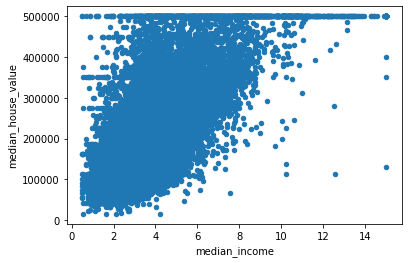

In [3]:
housing.plot.scatter("median_income", "median_house_value")

#Construct input and output data for linear regression problem

In [4]:
x=housing.iloc[:,7]  # Median Income as the input
x.shape
y=housing.iloc[:,8]  # Median House value as output
y.shape

(20640,)

# Create training & testing set

In [5]:
x_train=x[0:15000]
y_train=y[0:15000]
x_test=x[15000:]
y_test=y[15000:]

#Formulate a linear regression problem with gradient descent algo

In [9]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
seed(1)

global alpha  ## Learning rate 
alpha=0.001
#Initialize the weights/parameters for gradient descent
global theta_0
global theta_1

def gradient_descent(x,y): 
    # Initialize the weights theta_1 and theta_0 
    theta_0=0
    theta_1=0
    itr=1000 # number of iterations for which weights are updated
    n=len(x)    
    for i in range(itr):
        ycap=theta_1*x_train+theta_0
        cost=1/n*sum([val**2 for val in (y_train-ycap)])
        J1=-2/n*sum(x_train*(y_train-ycap))
        J2=-2/n*sum(y_train-ycap)
        
        theta_1=theta_1-alpha*J1
        theta_0=theta_0-alpha*J2
        
        print("itr{}, cost {}, theta_1 {}, theta_0 {}".format(i,cost/100000,theta_1,theta_0,)) 
    return (theta_1,theta_0)

# Give function call to gradient_descent

In [10]:
theta_1,theta_0=gradient_descent(x_train,y_train)

itr0, cost 519519.30152041407, theta_1 1802.735831948841, theta_0 397.192202
itr1, cost 486083.8687873725, theta_1 3537.576688780223, theta_0 779.9002344897438
itr2, cost 455115.9460256944, theta_1 5207.076037006274, theta_0 1148.668653063285
itr3, cost 426433.4245615938, theta_1 6813.6913110223595, theta_0 1504.0215334490617
itr4, cost 399867.6358228558, theta_1 8359.787524733094, theta_0 1846.463241727347
itr5, cost 375262.3594237903, theta_1 9847.640747350455, theta_0 2176.4791755809806
itr6, cost 352472.9044561531, theta_1 11279.441448472297, theta_0 2494.536477668734
itr7, cost 331365.25858322915, theta_1 12657.29771735734, theta_0 2801.0847221697813
itr8, cost 311815.2999330206, theta_1 13983.238361128002, theta_0 3096.5565755082202
itr9, cost 293708.06715579814, theta_1 15259.21588645443, theta_0 3381.368432228747
itr10, cost 276937.0833533374, theta_1 16487.109369101792, theta_0 3655.9210269579658
itr11, cost 261403.72990396796, theta_1 17668.727215558098, theta_0 3920.60002335

# Predict for testing set

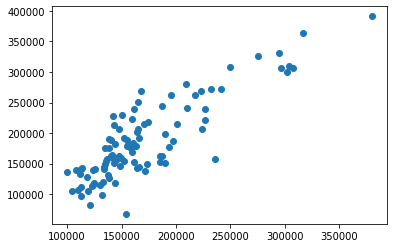

In [11]:
y_hat=theta_1*x_test+theta_0
y_hat
import matplotlib.pyplot as plt
plt.scatter(y_test[0:100],y_hat[0:100])
plt.show()